# 2ое домашнее задание - Метод главных компонент и k-ближайших соседей

**Выполнила**: Полиенко Анастасия Николаевна, НПМбд-01-19 (вторая подгруппа)

In [191]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Загрузим датасет с изображением рукописных цифр

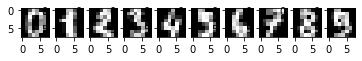

In [193]:
digits = load_digits()
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(digits.images[i], cmap = 'gray')
X = digits['data']
labels = digits['target']

Реализуем алгоритм PCA в виде класса.

В методе init() сохраняется число компонент.

В методе fit() реализуется центровка данных $X_c = X - \overline(X)$, вычисление ковариационной матрицы $C = X_c^T \cdot X_c$ и
нахождение собственных векторов $F$ и собственных значений $\lambda$ этой матрицы.

В методе transform() происходит смена координат в новом базисе $Y = X_c \cdot F$.

В методе fit_transform() решается задача метода главных координат с помощью выше описанных методов.

In [195]:
class PCA():
    
    '''
    n_compomemts -- сколько компонент оставляем
    '''
    
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = X
        m = np.mean(X1, axis = 0)
        X1 -= m
        C = X1.T.dot(X1)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        # _, S, Vh = np.linalg.svd(C, full_matrices = False)
        # F1, l1 = Vh.T, S
        return X1, F
        
    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X):
        X_c, F = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

Изобразим на графике точки нашего датасета, оставив только 2 главные координаты. Можем увидеть отдельные кластеры, окрашенные в
цвета, соответствующие определённой цифре.

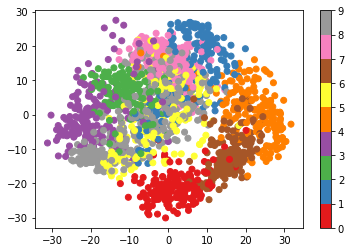

In [199]:
test = PCA(2)
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'Set1')
plt.colorbar()

Реализуем алгоритм kNN в виде класса.

В методе init() сохраняется число соседей, по умолчанию их 5.

В методе fit() сохряняются обучающие данные.

В методе predict() происходит вычисление возможного класса, к которому принадлежит тестируемый объект. Для этого необходимо 
вычислить расстояние от тестируемой точки до точек в обучающей базе. Далее находим k ближайших точек и смотрим, к какому классу
они принадлежат. Класс, к которому принадлежит большее число соседей, и будет классом, к которому вероятнее всего принадлежит
искомая точка.

In [207]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)):
                #вычисляем расстояние от точки до каждого элемента X_train
                dist = np.sqrt(np.sum((np.array(self.X_train[j]) - np.array(item)) ** 2)) 
                point_dist.append(dist)
            point_dist = np.array(point_dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg:
                #находим соответсвующие лэйблы к этим соседям
                min_dist_labels.append(self.y_train[i]) 
            #вычисляем уникальные метки и их количество
            values, counts = np.unique(min_dist_labels, return_counts = True) 
            #находим метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

Посмотрим на точной вычислений при разных числах соседей и разном количестве главных компонент

In [208]:
'''
Изначальный датасет, без изменения через PCA
'''
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Accuracy with k = 2: 94.86666666666666
Accuracy with k = 5: 94.73333333333333
Accuracy with k = 7: 93.60000000000001
Accuracy with k = 15: 91.26666666666667
Accuracy with k = 30: 86.33333333333333


In [209]:
'''
2 главные компоненты
'''
test = PCA(2)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Accuracy with k = 2: 54.93333333333334
Accuracy with k = 5: 60.266666666666666
Accuracy with k = 7: 60.93333333333333
Accuracy with k = 15: 62.93333333333333
Accuracy with k = 30: 62.2


In [211]:
'''
5 главных компонент
'''
test = PCA(5)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Accuracy with k = 2: 85.86666666666667
Accuracy with k = 5: 89.26666666666667
Accuracy with k = 7: 88.2
Accuracy with k = 15: 86.8
Accuracy with k = 30: 83.26666666666667


In [212]:
'''
10 главных компонент
'''
test = PCA(10)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Accuracy with k = 2: 93.53333333333333
Accuracy with k = 5: 91.86666666666666
Accuracy with k = 7: 91.66666666666666
Accuracy with k = 15: 89.2
Accuracy with k = 30: 86.93333333333332


In [210]:
'''
15 главныx компонент
'''
test = PCA(15)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = kNN(2)
test_k_2.fit(X_train, y_train)
y_out_k_2 = test_k_2.predict(X_test)
print("Accuracy with k = 2:", accuracy_score(y_test, y_out_k_2) * 100)
test_k_5 = kNN()
test_k_5.fit(X_train, y_train)
y_out_k_5 = test_k_5.predict(X_test)
print("Accuracy with k = 5:", accuracy_score(y_test, y_out_k_5) * 100)
test_k_7 = kNN(7)
test_k_7.fit(X_train, y_train)
y_out_k_7 = test_k_7.predict(X_test)
print("Accuracy with k = 7:", accuracy_score(y_test, y_out_k_7) * 100)
test_k_15 = kNN(15)
test_k_15.fit(X_train, y_train)
y_out_k_15 = test_k_15.predict(X_test)
print("Accuracy with k = 15:", accuracy_score(y_test, y_out_k_15) * 100)
test_k_30 = kNN(30)
test_k_30.fit(X_train, y_train)
y_out_k_30 = test_k_30.predict(X_test)
print("Accuracy with k = 30:", accuracy_score(y_test, y_out_k_30) * 100)

Accuracy with k = 2: 94.93333333333334
Accuracy with k = 5: 94.06666666666666
Accuracy with k = 7: 93.13333333333334
Accuracy with k = 15: 90.73333333333333
Accuracy with k = 30: 87.46666666666667
